<a href="https://colab.research.google.com/github/Anupa-123/Bike-sharing-demand-prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [176]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
from scipy import stats

import warnings
warnings.filterwarnings('ignore')



**Mount the drive and import the dataset.**

In [177]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [178]:
#Reading csv file
data= pd.read_csv("/content/drive/MyDrive/SeoulBikeData.csv", encoding = "ISO-8859-1")

**Understand more abount the data.**

In [179]:
# Copy the data for backup
df = data.copy()

In [180]:
# Checking of records of the dataframe
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [181]:
# Checking bottom records in the dataframe
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [182]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

**Rename Columns**

In [183]:
df.rename(columns={'Rented Bike Count': 'Rented_Bike_Count','Wind speed (m/s)':'WindSpeed','Visibility (10m)':'Visibility',
 'Dew point temperature(°C)': 'Dew_Point_Temperature', 'Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall',
 'Functioning Day':'Functioning_Day','Temperature(°C)':'Temperature','Humidity(%)':'Humidity'}, inplace=True)

In [184]:
# Data shape
df.shape

(8760, 14)

The dataset contains 8760 rows and 14 columns.

In [185]:
 #Change The datatype of Date columns to extract 'Month' ,'Day', "year". so  further we can analyze the Bike rentals with respect to year months and days.
df['Date']=df['Date'].astype('datetime64[ns]')

In [186]:
# Creating new columns 'Month', 'Year' ,'Day.
df['Month']=df['Date'].dt.month

 #dt.day_name() and dt.month_name()  will give day names and month names
# dt.month will give month numbers as 1,2,3,...12

df['Day']=df['Date'].dt.day_name()    
    
                                                          

In [187]:
#  Creating new column and Encoding with 1 if its weekend and 0 if its Weekdays.
df['Weekdays_or_weekend']=df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)


In [188]:
# check the Newly Created columns
df.head(5)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,WindSpeed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Day,Weekdays_or_weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0


In [189]:
# Now We can Drop Day and Date columns.
df.drop(['Date',"Day"],axis=1 ,inplace=True)

In [190]:
#variable which informs us if it is night or day
df['label_day_night']=df['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))

In [191]:
df.Functioning_Day.value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [192]:
df.Holiday.value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [193]:
df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [194]:
#Get distinct categories counts for for Month categories
df['Month'].value_counts()

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64

In [195]:
#Get distinct categories counts for for Weekdays_or_weekend categories
df['Weekdays_or_weekend'].value_counts()

0    6216
1    2544
Name: Weekdays_or_weekend, dtype: int64

In [196]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   WindSpeed              8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_Point_Temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  Month                  8760 non-null   int64  
 14  Weekdays_or_weekend    8760 non-null   int64  
 15  labe

In [197]:
df.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity,WindSpeed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,Month,Weekdays_or_weekend
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,0.290411
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,0.453978
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,1.000000


In [198]:
# Statistical info 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented_Bike_Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
WindSpeed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew_Point_Temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar_Radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [199]:
# Print the unique values
df.nunique()

Rented_Bike_Count        2166
Hour                       24
Temperature               546
Humidity                   90
WindSpeed                  65
Visibility               1789
Dew_Point_Temperature     556
Solar_Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning_Day             2
Month                      12
Weekdays_or_weekend         2
label_day_night             2
dtype: int64

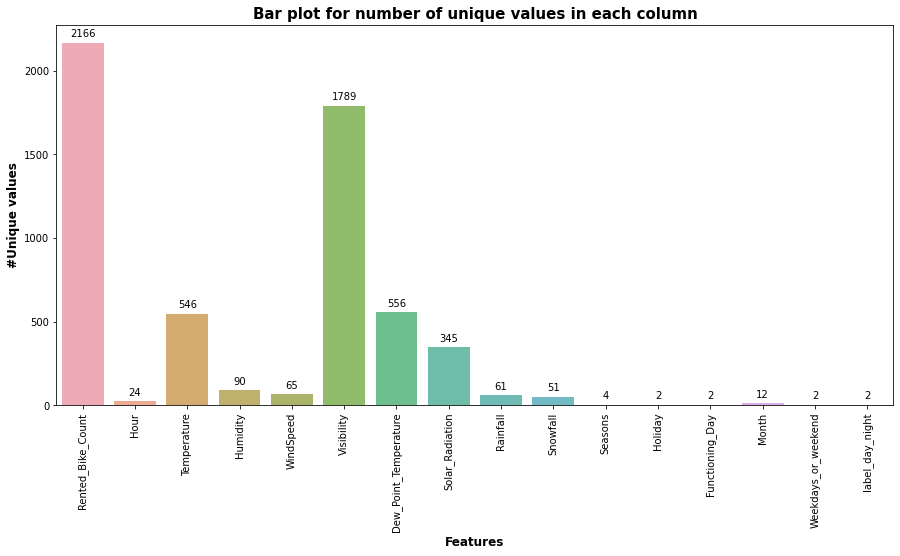

In [200]:
# Unique Values in each column
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

**Basic cleaning of the data**

**Misssing Values**





In [201]:
# Checking null values of data 
df.isna().sum()

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
WindSpeed                0
Visibility               0
Dew_Point_Temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Month                    0
Weekdays_or_weekend      0
label_day_night          0
dtype: int64

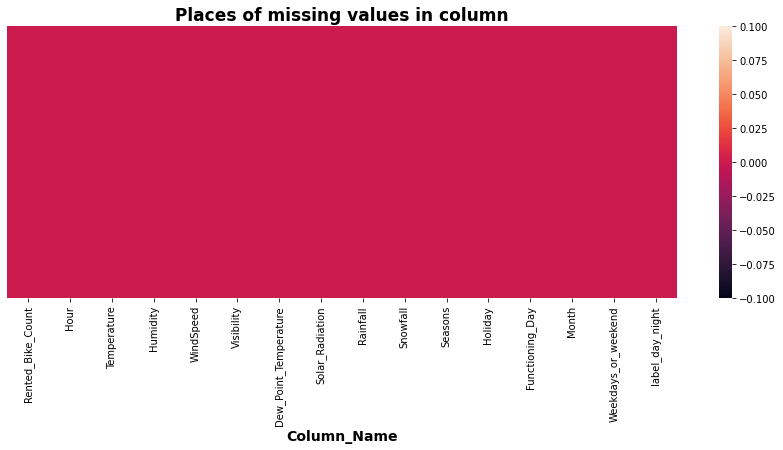

In [202]:
# No missing Values in our dataset
plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

**Duplicate Values**

In [203]:
# Checking duplicate
df.duplicated().sum()

0

As we can see in the above data there is no missng and duplicate value.

**Handling outliers**

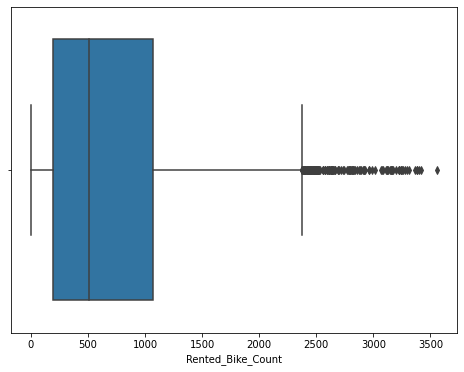

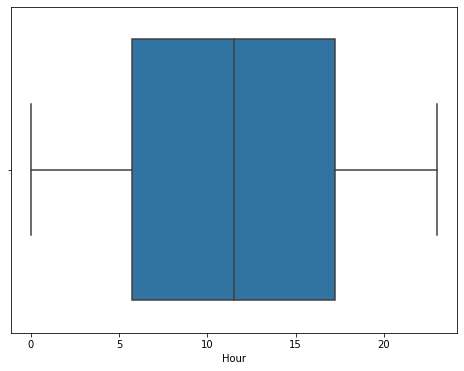

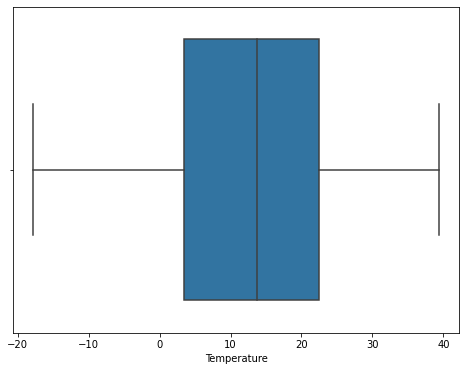

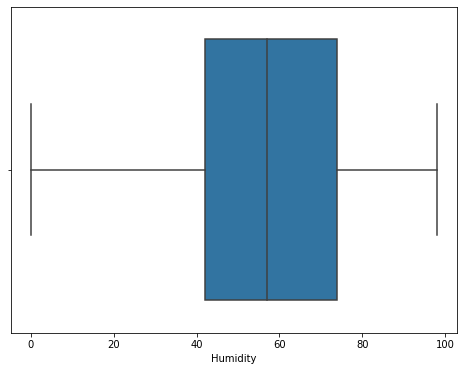

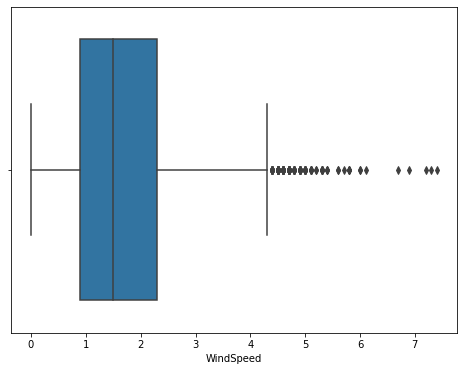

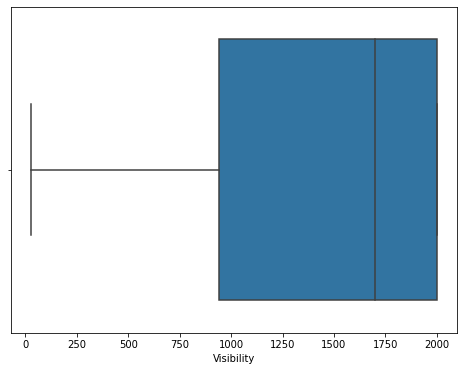

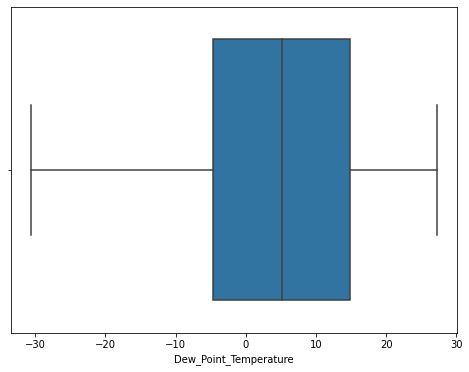

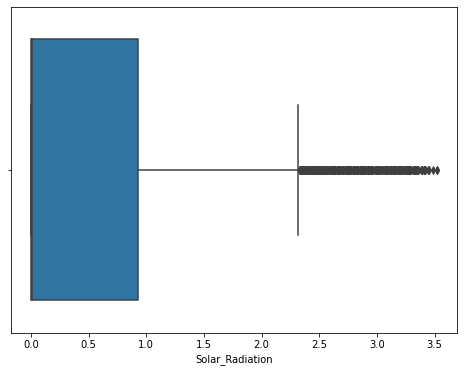

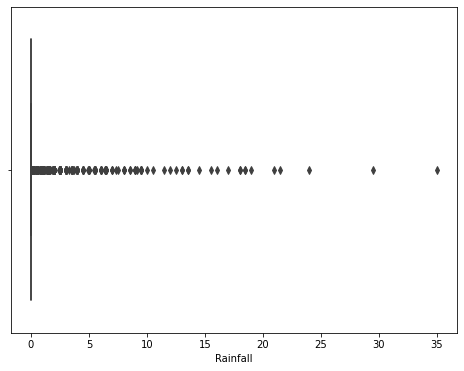

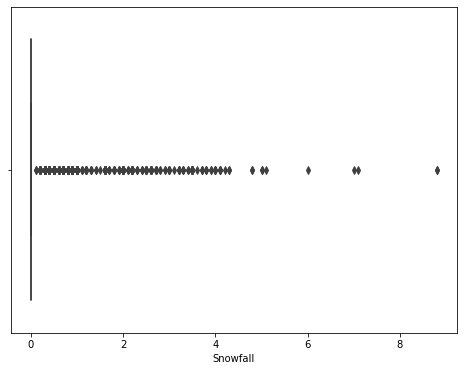

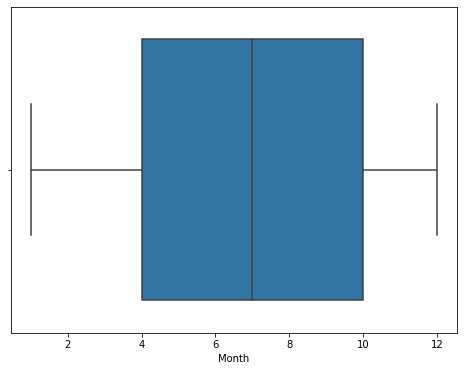

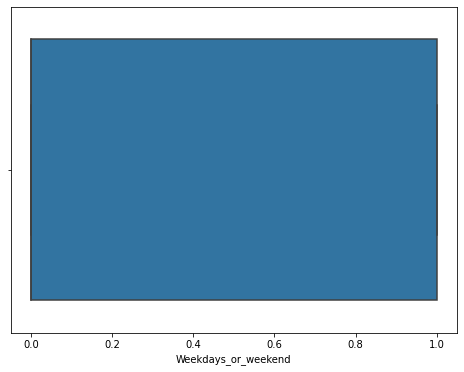

In [204]:
# create numeric columns list.
numeric_columns=df.describe().columns.tolist()
numeric_columns

# create categorical column list
categorical_columns= list(set(df.columns) - set(df.describe().columns))
categorical_columns

# priting box plot of numeric columns to check oultliers
for columns in numeric_columns:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.gca()
    sns.boxplot(x=df[columns])

We don't think of worry about outliers in this data

In [205]:
# adding two  more categorical columns 
categorical_columns.extend(['Month','Weekdays_or_weekend'])


**Exploratory data analysis(EDA)**

When we observe the data we realize that Hour column is a numerical column but it is a time stamp so we have to treat Hour as a categorical feature.

In [206]:
# convert Hour column integer to Categorical 
df['Hour']=df['Hour'].astype('object')

In [207]:
# Divide Data in categorical and numerical features
numeric_columns= df.select_dtypes(exclude='object')
categorical_columns=df.select_dtypes(include='object')

In [208]:
numeric_columns.head()

,Rented_Bike_Count,Temperature,Humidity,WindSpeed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,Month,Weekdays_or_weekend
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0


In [209]:
categorical_columns.head()

,Hour,Seasons,Holiday,Functioning_Day,label_day_night
0,0,Winter,No Holiday,Yes,Night
1,1,Winter,No Holiday,Yes,Night
2,2,Winter,No Holiday,Yes,Night
3,3,Winter,No Holiday,Yes,Night
4,4,Winter,No Holiday,Yes,Night


**Univariate Analysis**

In this we'll just focus on the dependent variable,a dependent variable is a variable whose value will change depending on the value of another variable.
 

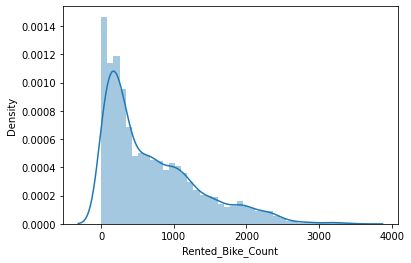

In [210]:
#visualising distribution

sns.distplot(df['Rented_Bike_Count'])

**Bike rented trend according to hour**

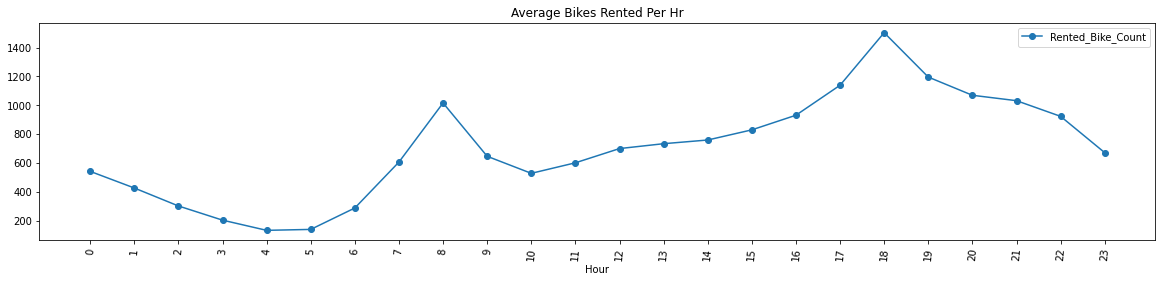

In [211]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df.groupby('Hour')['Rented_Bike_Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);

We can clearly see that high rise of Rented Bikes from 8:00 a.m to 9:00 p.m means people prefer rented bike during rush hour.

We can observe from the above plot that there is sudden peak between 6/7AM to 10 AM.
Office time,College and going time could be the reason for this sudden peak (Weekdays). But on Weekend the case is different less bike rentals happend.

Again there is peak between 10 AM to 7 PM. may be its office leaving time for the above people.(Weekdays).

**Bike rented trend according to month**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

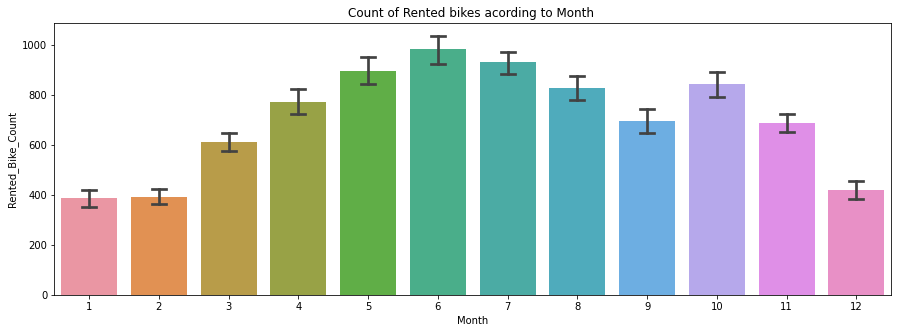

In [212]:
#Monthly trend of bike demand
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(data=df,x='Month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

Above barplot shows that from March Bike Rent Count started increasing and it was highest in June.

**Trend of bike according to temperature**

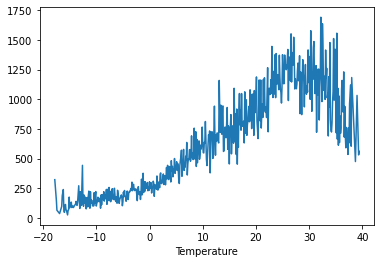

In [213]:
# Plot to see trend of bike according to temperature
df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

From the above plot we see that people like to ride bikes when it is pretty hot around 25°C in average

**Plot of rented bikes according to rainfall**

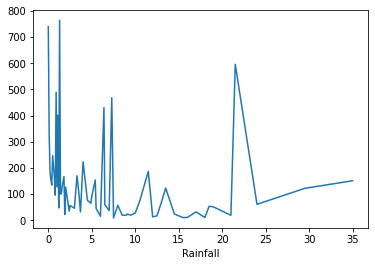

In [214]:
df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

This raise between 20 and 25 mm of rainfall seems very contradictory, so we decide to explain this:

We can see that these days of rainfall are in the summer and the T° is not bad, furthermore theses are Week Days, that's why we have so much rented bike even if the rain is so important

**Bivariate Analysis**

**Trend of bikes according to weedays or weekend**

In [215]:
df1VizDays=pd.DataFrame(df.groupby('Weekdays_or_weekend').sum()['Rented_Bike_Count'].sort_values(ascending=False))
df1VizDays.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Rented_Bike_Count
Weekdays_or_weekend,
0,4462544
1,1709770


**Bike rented according to hour on weekdays or on weekend**

[Text(0.5, 1.0, 'Count of bikes during different days')]

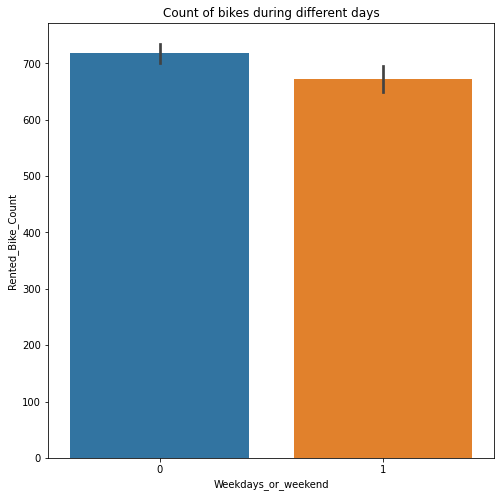

In [216]:
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(data=df, x='Weekdays_or_weekend', y='Rented_Bike_Count', ax=ax)
ax.set(title='Count of bikes during different days')

 Most of the bikes were rented on Weekdays compared to weekends.

**Trend of bike according to functioning day**

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Functioning day')

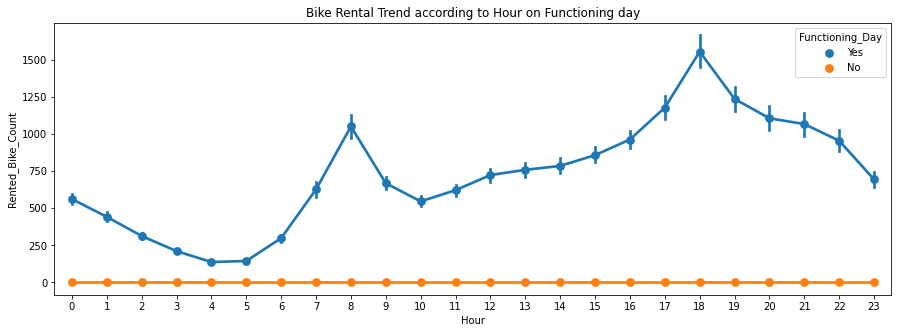

In [217]:
#Bike Rental trend with respect to Hour on Functioning day.
plt.figure(figsize=(15,5))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Functioning_Day'])
plt.title("Bike Rental Trend according to Hour on Functioning day")

Here the trend for functioning day is same as of Weekdays. Only the difference is on No functioning day there is no bike rentals.

**Trend of rented bike according to seasons**

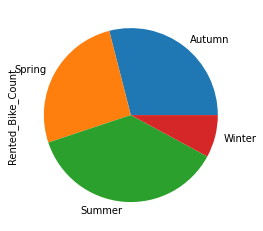

In [218]:
df.groupby('Seasons').sum()['Rented_Bike_Count'].plot.pie()

We observe that in the summer season trend of rented bike is high.

**Numeric Variable Analysis**

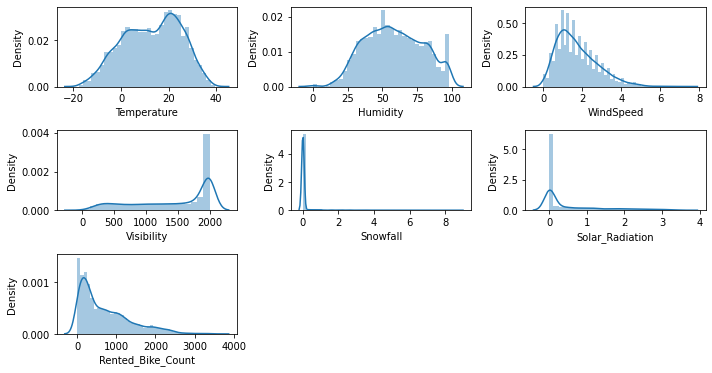

In [219]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(["Temperature", "Humidity", "WindSpeed", "Visibility", "Snowfall","Solar_Radiation", "Rented_Bike_Count"]):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.distplot(df[j])
    plt.tight_layout()

Here we obsereved that

Humidity is most likely to be between 50-75 units.

Windspeed is most commonly seen between 8-12 units.

People like to ride bikes around 25°C in average.

Visibility is highest at 2000.

**Categorical Variable Analysis**

In [220]:
#Extracting categorical features
categorical_features= df.select_dtypes(include='object')
categorical_features

,Hour,Seasons,Holiday,Functioning_Day,label_day_night
0,0,Winter,No Holiday,Yes,Night
1,1,Winter,No Holiday,Yes,Night
2,2,Winter,No Holiday,Yes,Night
3,3,Winter,No Holiday,Yes,Night
4,4,Winter,No Holiday,Yes,Night
...,...,...,...,...,...
8755,19,Autumn,No Holiday,Yes,Day
8756,20,Autumn,No Holiday,Yes,Day
8757,21,Autumn,No Holiday,Yes,Night
8758,22,Autumn,No Holiday,Yes,Night


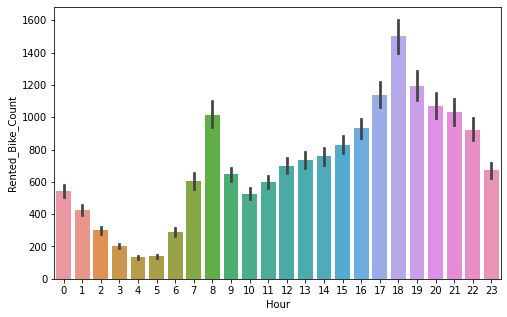

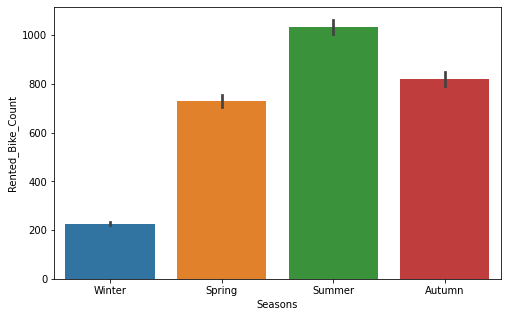

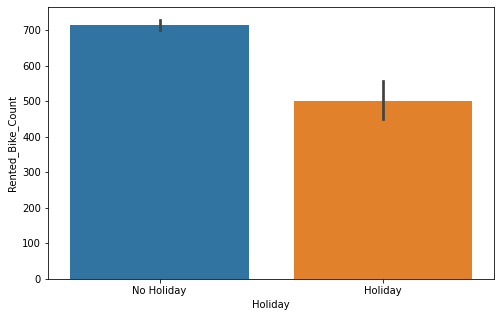

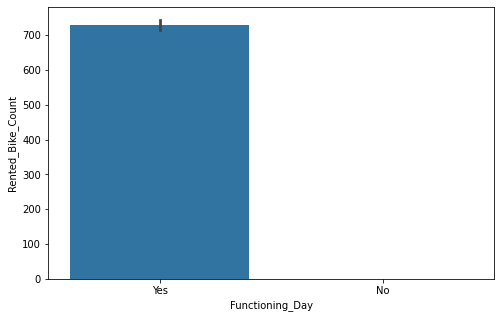

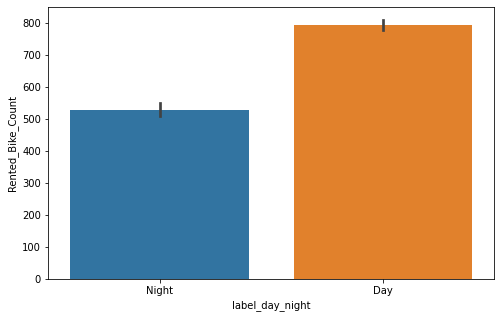

In [221]:
# plot barchart plot for each categorical columns with respect to target variable to get insights
for col in categorical_columns:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.gca()
    sns.barplot(x=df[col],y=df['Rented_Bike_Count'])

 From above plots we observed that:
 
 1)Summer season had the higest Bike Rent Count. People are more likely to rent bikes in summer. Bike rentals in winter is very less compared to other seasons.

2) High number of bikes were rented on No Holidays.

3) On no functioning day no bikes were rented. we have only 295 counts of "NO". Thus we can drop that 295 values but column having only "Yes' will not add value to our column.So these columns is not use full for us. We will drop those in next steps.

4) Most of the bikes were rented on Weekdays compared to weekends.

5) From March Bike Rent Count started increasing and it was highest in June.

6)There are much more rents during the day than the night.

**Heatmap**

Let see the correlation between variables using correlation heatmap.

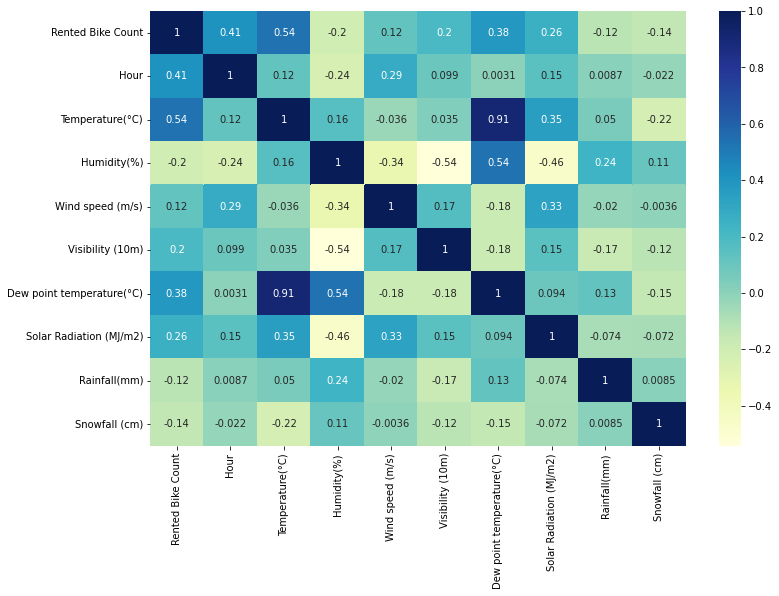

In [222]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (12, 8))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()


From above we can say that, temperature and dew point temperature are highly correlated means both the variables together cannot be used in model because it will lead to multicollinearity. So from VIP and p-value we will consider which variable to take.

**Modeling**

Lets prepare data for modeling

In [223]:
df.head(1)

,Rented_Bike_Count,Hour,Temperature,Humidity,WindSpeed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Weekdays_or_weekend,label_day_night
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0,Night


In [224]:
# Since Temperature and Dew point temperature are corelated with each other. We will drop dew point temperature.
df.drop('Dew_Point_Temperature',inplace=True,axis=1)

In [225]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [226]:
# Calculating VIF
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Temperature,3.171530
1,Humidity,6.066805
2,WindSpeed,4.080195
3,Visibility,5.190667
4,Solar_Radiation,2.272011
5,Rainfall,1.080347
6,Snowfall,1.124013
7,Month,4.541571
8,Weekdays_or_weekend,1.397667


Here, humidity vif is greater than 5 so we will remove that column.

VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.

or

VIF score of an independent variable represents how well the variable is explained by other independent variables.

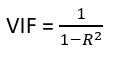

In [227]:
# Calculating VIF
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Humidity','Visibility']]])

,variables,VIF
0,Temperature,2.342641
1,WindSpeed,2.819826
2,Solar_Radiation,1.892036
3,Rainfall,1.030086
4,Snowfall,1.075716
5,Month,2.833403
6,Weekdays_or_weekend,1.342071


Now we have VIF values in the range of 1 to 5. we will drop 'Humidity','Visibility' this columns from our dataset

In [228]:
# As per above vif calculation dropping humidity and visibility columns.
df.drop(['Humidity','Visibility'],inplace=True,axis=1)

In [229]:
# checking categoiries in season column.
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [230]:
# Createing dummy variables
df=pd.get_dummies(df,columns=['Seasons'],prefix='Seasons',drop_first=True)

In [231]:
# checking categoiries in holiday columns.
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [232]:
# Labeling for holiday=1 and no holiday=0
df['Holiday']=df['Holiday'].map({'No Holiday':0, 'Holiday':1})

In [233]:
# # Labeling for Yes=1 and no No=0
df['Functioning_Day']=df['Functioning_Day'].map({'Yes':1, 'No':0})

In [234]:
# checking dummy and labled columns
df.head(3)

,Rented_Bike_Count,Hour,Temperature,WindSpeed,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,Month,Weekdays_or_weekend,label_day_night,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,2.2,0.0,0.0,0.0,0,1,1,0,Night,0,0,1
1,204,1,-5.5,0.8,0.0,0.0,0.0,0,1,1,0,Night,0,0,1
2,173,2,-6.0,1.0,0.0,0.0,0.0,0,1,1,0,Night,0,0,1


In [235]:
# final info before going for modeling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented_Bike_Count    8760 non-null   int64  
 1   Hour                 8760 non-null   object 
 2   Temperature          8760 non-null   float64
 3   WindSpeed            8760 non-null   float64
 4   Solar_Radiation      8760 non-null   float64
 5   Rainfall             8760 non-null   float64
 6   Snowfall             8760 non-null   float64
 7   Holiday              8760 non-null   int64  
 8   Functioning_Day      8760 non-null   int64  
 9   Month                8760 non-null   int64  
 10  Weekdays_or_weekend  8760 non-null   int64  
 11  label_day_night      8760 non-null   object 
 12  Seasons_Spring       8760 non-null   uint8  
 13  Seasons_Summer       8760 non-null   uint8  
 14  Seasons_Winter       8760 non-null   uint8  
dtypes: float64(5), int64(5), object(2), ui

 **Checking ForLinearity**

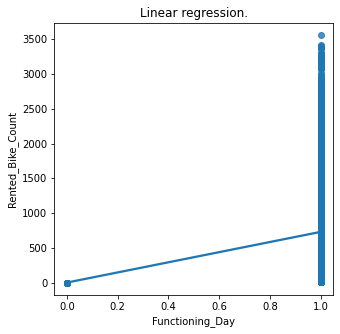

In [236]:
plt.figure(figsize=(5,5))
plt.title('Linear regression.')
plt.xlabel('Functioning_Day')
plt.ylabel('Rented_Bike_Count')
sns.regplot(x=df['Functioning_Day'],y=df['Rented_Bike_Count'])

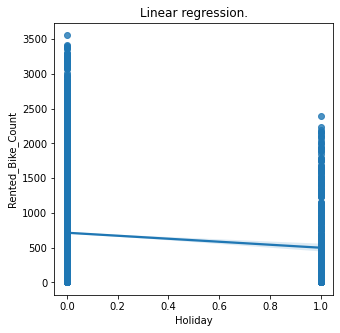

In [237]:
plt.figure(figsize=(5,5))
plt.title('Linear regression.')
plt.xlabel('Holiday')
plt.ylabel('Rented_Bike_Count')
sns.regplot(x=df['Holiday'],y=df['Rented_Bike_Count'])

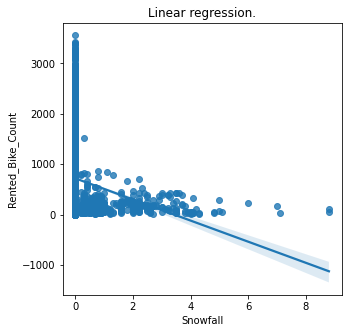

In [238]:
plt.figure(figsize=(5,5))
plt.title('Linear regression.')
plt.xlabel('Snowfall')
plt.ylabel('Rented_Bike_Count')
sns.regplot(x=df['Snowfall'],y=df['Rented_Bike_Count'])

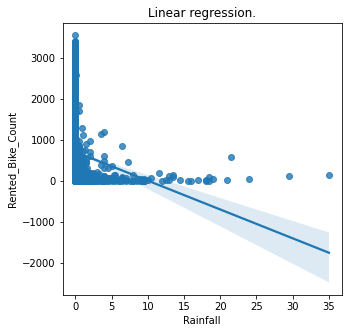

In [239]:
plt.figure(figsize=(5,5))
plt.title('Linear regression.')
plt.xlabel('Rainfall')
plt.ylabel('Rented_Bike_Count')
sns.regplot(x=df['Rainfall'],y=df['Rented_Bike_Count'])

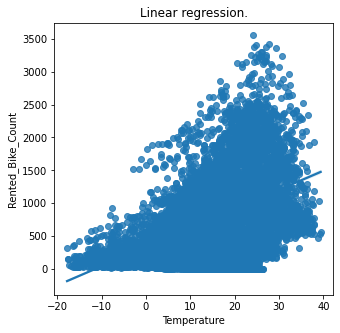

In [240]:
plt.figure(figsize=(5,5))
plt.title('Linear regression.')
plt.xlabel('Temperature	')
plt.ylabel('Rented_Bike_Count')
sns.regplot(x=df['Temperature'],y=df['Rented_Bike_Count'])

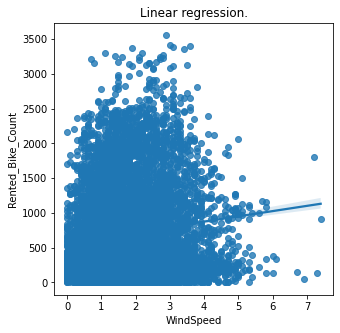

In [241]:
plt.figure(figsize=(5,5))
plt.title('Linear regression.')
plt.xlabel('WindSpeed')
plt.ylabel('Rented_Bike_Count')
sns.regplot(x=df['WindSpeed'],y=df['Rented_Bike_Count'])

**Linear Regression**

In [242]:
# Define X-variable(Independent Variables) and Y-Variable(Dependent Variable)
X = df[['Hour','WindSpeed','Solar_Radiation','Rainfall','Snowfall','Seasons_Spring','Seasons_Summer','Seasons_Winter','Holiday','Functioning_Day','Month']]
y = np.sqrt(df['Rented_Bike_Count'])

In [243]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [244]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7008, 11)
(7008,)
(1752, 11)
(1752,)


In [245]:
 #Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [246]:
#Regression coefficient
regressor.coef_

array([ 6.41693305e-01,  2.84619198e-01,  2.14040456e+00, -1.93746888e+00,
       -1.55528056e+00, -3.98932766e+00,  1.53891497e+00, -1.34790700e+01,
       -1.82089209e+00,  2.75392080e+01, -1.76674355e-02])

In [247]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [248]:
r2_score(y_test, y_pred)

0.5895635701961102

In [249]:
# Validating Assumptions
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [250]:
# Test dataset metrics
def print_metrics(actual, predicted):
  print_metrics(y_test, y_test_pred)

**Evaluation of train data set**

In [251]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_train_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_train_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_train_pred)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 6.209640732286035.
The Mean Squred Error(MSE) is 64.74025548186708.
The Root Mean Squared Error(RMSE) is 8.046132952037711.
The R2 Score is 0.5805161305060285.


In [252]:
#Saving train data set results in dataframe.
train_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [253]:
# create training_result dataframe
traing_results_df=pd.DataFrame(train_dict,index=[1])
traing_results_df

,Model,MAE,MSE,RMSE,R2_score
1,Linear Regression,6.2096,64.7403,8.0461,0.5805


**Evaluation of test data set**

In [254]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 6.263454898965212.
 The Mean Squred Error(MSE) is 64.63809713908427.
The Root Mean Squared Error(RMSE) is 8.039782157439607.
The R2 Score is 0.5895635701961102.


In [255]:
# saving test result in dictionary.
test_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [256]:
# create test_result dataframe
test_results_df=pd.DataFrame(test_dict,index=[1])
test_results_df

,Model,MAE,MSE,RMSE,R2_score
1,Linear Regression,6.2635,64.6381,8.0398,0.5896


We have observed that on testing data R2 score is 0.5896 which is almost close to training data R2 score.Hence we can say that our model performance is good and overfitting is not observed.

In [257]:
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


Adjusted R2 : 0.5869688571341316


The r2_score for the test set is 0.5869. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [258]:
#Residual = Actual value - Predicted value

residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

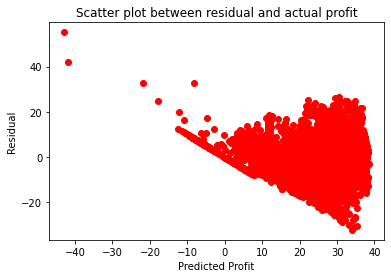

In [259]:
  #  Plotting scatter plot between residual and fitted values(Checking For heteroscedasticity)                                                                                                                                                                                                               #  Plotting scatter plot between residual and fitted values(Checking For heteroscedasticity)
plt.scatter(y_train_pred, residuals_train,c='red')
plt.title('Scatter plot between residual and actual profit')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual')
plt.show()


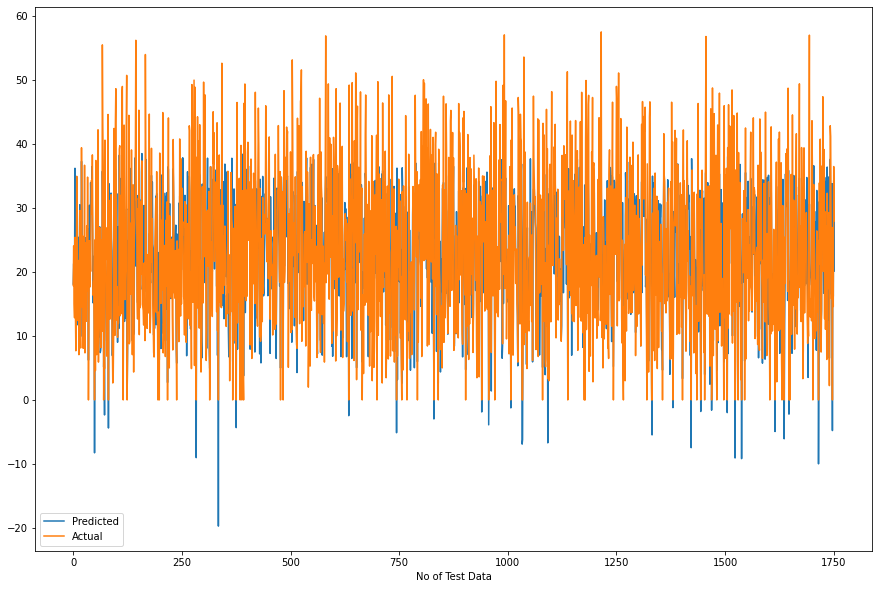

In [260]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_test_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()